# Task 1: LINEAR REGRESSION ON HOUSING PRICES

## Step 1: Load data

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/the-boston-housing-dataset/Boston (1).csv')

In [7]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Step 2: Preprocess the Data

In [8]:
# Define features and target variable
X = df.drop('MEDV', axis=1)  # 'MEDV' is the column to predict
y = df['MEDV']


## Step 3: Split the Data 

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=2529)


In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((151, 13), (355, 13), (151,), (355,))

## Step 4: Train the Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [12]:
model.intercept_

59.16385546186747

In [13]:
model.coef_

array([-1.56768929e-01,  4.90146923e-02, -7.63870975e-03,  1.64992648e+00,
       -1.94040814e+01,  1.37884640e+00, -1.19149396e-02, -1.83263988e+00,
        2.70371528e-01, -7.30401764e-03, -1.20178781e+00,  1.13136435e-02,
       -6.68484293e-01])

## Step 5: Evaluate the Model

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the prices on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 3.7166764796675067
Mean Squared Error: 26.74323985937892
Root Mean Squared Error: 5.1713866476389985
R-squared: 0.6886683662164186


## Step 6: Visualize the Results 

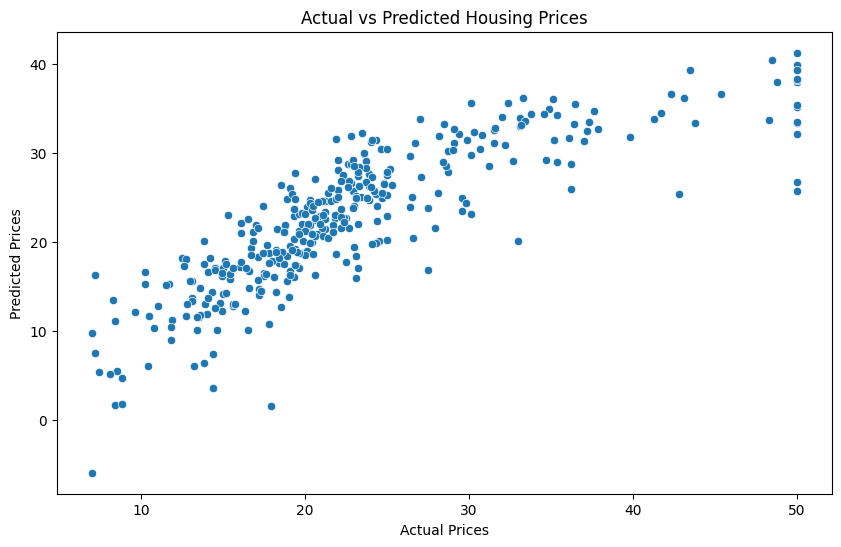

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.show()
